In [36]:
import pandas as pd
import datetime as dt
pd.set_option("display.max_columns", None)
df_ = pd.read_excel("OnlineRetail\online_retail_II.xlsx",
                    sheet_name="Year 2010-2011")
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [38]:
df = df[['InvoiceDate', 'StockCode', 'Customer ID', 'Country']]
df.dropna(inplace=True)
df.isnull().sum()

C:\Users\ragam\AppData\Local\Temp\ipykernel_12980\1589599256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


InvoiceDate    0
StockCode      0
Customer ID    0
Country        0
dtype: int64

In [39]:
df.rename(columns={'InvoiceDate' : 'TimeStamp', 
                   'StockCode' : 'ErrorCode',
                   'Customer ID' : 'ServerID',
                   'Country' : 'Region'
                   }, inplace=True)
df.head()

C:\Users\ragam\AppData\Local\Temp\ipykernel_12980\213857921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'InvoiceDate' : 'TimeStamp',


,TimeStamp,ErrorCode,ServerID,Region
0,2010-12-01 08:26:00,85123A,17850.0,United Kingdom
1,2010-12-01 08:26:00,71053,17850.0,United Kingdom
2,2010-12-01 08:26:00,84406B,17850.0,United Kingdom
3,2010-12-01 08:26:00,84029G,17850.0,United Kingdom
4,2010-12-01 08:26:00,84029E,17850.0,United Kingdom


In [46]:
print("Total Records",len(df))
print("Data from {} to {}".format(df['TimeStamp'].min(), df['TimeStamp'].max()))
print('unique errors: ', (df["ErrorCode"].nunique()))
print('unique servers: ', (df["ServerID"].nunique()))
print('unique regions: ', (df["Region"].nunique()))

Total Records 406830
Data from 2010-12-01 08:26:00 to 2011-12-09 12:50:00
unique errors:  3684
unique servers:  4372
unique regions:  37


In [56]:
df_errors = pd.DataFrame(df.groupby('TimeStamp')['ErrorCode'].nunique())
df_errors.rename(columns={'ErrorCode' : '#Errors'}, inplace=True)
df_errors.head()

,#Errors
TimeStamp,
2010-12-01 08:26:00,7
2010-12-01 08:28:00,2
2010-12-01 08:34:00,16
2010-12-01 08:35:00,1
2010-12-01 08:45:00,20


In [78]:
# A variety of resamples which I may or may not use
df_hourly = df_errors.resample('h').sum().reset_index()
df_daily = df_errors.resample('d').sum().reset_index()
df_weekly = df_errors.resample('W').sum().reset_index()

print(df_hourly.head())
print(df_daily.head())
print(df_weekly.head())

            TimeStamp  #Errors
0 2010-12-01 08:00:00       46
1 2010-12-01 09:00:00      150
2 2010-12-01 10:00:00      120
3 2010-12-01 11:00:00      335
4 2010-12-01 12:00:00      390
   TimeStamp  #Errors
0 2010-12-01     1869
1 2010-12-02     1981
2 2010-12-03     1094
3 2010-12-04        0
4 2010-12-05     2529
   TimeStamp  #Errors
0 2010-12-05     7473
1 2010-12-12     9459
2 2010-12-19     7095
3 2010-12-26     1889
4 2011-01-02        0


In [79]:
for DataFrame in [df_hourly, df_daily]:
    DataFrame['Weekday'] = (pd.Categorical(DataFrame['TimeStamp'].dt.strftime('%A'),
                                           categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
                           )
    DataFrame['Hour'] = DataFrame['TimeStamp'].dt.hour
    DataFrame['Day'] = DataFrame['TimeStamp'].dt.weekday
    DataFrame['Month'] = DataFrame['TimeStamp'].dt.month
    DataFrame['Year'] = DataFrame['TimeStamp'].dt.year
    DataFrame['Month_day'] = DataFrame['TimeStamp'].dt.day
    DataFrame['Lag'] = DataFrame['#Errors'].shift(1)
    DataFrame['Rolling_Mean'] = DataFrame['#Errors'].rolling(7, min_periods=1).mean()
    DataFrame = DataFrame.dropna()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
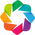

C:\Users\ragam\AppData\Local\Temp\ipykernel_12980\3187116395.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hv.Bars(df_hourly[['#Errors','Weekday']].groupby('Weekday').mean()).opts(


:Bars   [Weekday]   (#Errors)

In [100]:
import matplotlib.dates as mdates
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from IPython.display import HTML, display
hv.Bars(df_hourly[['#Errors','Weekday']].groupby('Weekday').mean()).opts(
    opts.Bars(title="New York City Taxi Demand by Day", xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

In [81]:
df_hourly = (df_hourly
             .join(df_hourly.groupby(['Hour','Weekday'])['#Errors'].mean(),
                   on = ['Hour', 'Weekday'], rsuffix='_Average')
            )

df_daily = (df_daily
            .join(df_daily.groupby(['Hour','Weekday'])['#Errors'].mean(),
                  on = ['Hour', 'Weekday'], rsuffix='_Average')
           )

df_hourly.tail()

C:\Users\ragam\AppData\Local\Temp\ipykernel_12980\1270837333.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .join(df_hourly.groupby(['Hour','Weekday'])['#Errors'].mean(),
C:\Users\ragam\AppData\Local\Temp\ipykernel_12980\1270837333.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .join(df_daily.groupby(['Hour','Weekday'])['#Errors'].mean(),


,TimeStamp,#Errors,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,#Errors_Average
8952,2011-12-09 08:00:00,111,Friday,8,4,12,2011,9,0.0,15.857143,34.166667
8953,2011-12-09 09:00:00,61,Friday,9,4,12,2011,9,111.0,24.571429,83.240741
8954,2011-12-09 10:00:00,130,Friday,10,4,12,2011,9,61.0,43.142857,134.259259
8955,2011-12-09 11:00:00,127,Friday,11,4,12,2011,9,130.0,61.285714,133.333333
8956,2011-12-09 12:00:00,179,Friday,12,4,12,2011,9,127.0,86.857143,181.222222


In [83]:
#Clear nulls
df_hourly.dropna(inplace=True)

# Daily
df_daily_model_data = df_daily[['#Errors', 'Hour', 'Day',  'Month','Month_day','Rolling_Mean']].dropna()

# Hourly
model_data = df_hourly[['#Errors', 'Hour', 'Day', 'Month_day', 'Month','Rolling_Mean','Lag', 'TimeStamp']].set_index('TimeStamp').dropna()
model_data.head()

,#Errors,Hour,Day,Month_day,Month,Rolling_Mean,Lag
TimeStamp,,,,,,,
2010-12-01 09:00:00,150,9,2,1,12,98.000000,46.0
2010-12-01 10:00:00,120,10,2,1,12,105.333333,150.0
2010-12-01 11:00:00,335,11,2,1,12,162.750000,120.0
2010-12-01 12:00:00,390,12,2,1,12,208.200000,335.0
2010-12-01 13:00:00,253,13,2,1,12,215.666667,390.0


In [95]:

from sklearn.ensemble import IsolationForest
IF = (IsolationForest(random_state=0,
                      contamination=0.005,
                      n_estimators=200,
                      max_samples=0.7))
    
IF.fit(model_data)
    
output = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)
    
score = IF.decision_function(model_data)

print(score)

[0.08968852 0.09397809 0.06589412 ... 0.13002063 0.1344178  0.13954719]


In [97]:
df_hourly = (df_hourly
             .assign(Outliers = output)
             .assign(Score = score)
            )

df_hourly

,TimeStamp,#Errors,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,#Errors_Average,Outliers,Score
1,2010-12-01 09:00:00,150,Wednesday,9,2,12,2010,1,46.0,98.000000,77.740741,0.0,0.089689
2,2010-12-01 10:00:00,120,Wednesday,10,2,12,2010,1,150.0,105.333333,130.111111,0.0,0.093978
3,2010-12-01 11:00:00,335,Wednesday,11,2,12,2010,1,120.0,162.750000,154.518519,0.0,0.065894
4,2010-12-01 12:00:00,390,Wednesday,12,2,12,2010,1,335.0,208.200000,234.981481,0.0,0.040092
5,2010-12-01 13:00:00,253,Wednesday,13,2,12,2010,1,390.0,215.666667,206.018519,0.0,0.072432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8952,2011-12-09 08:00:00,111,Friday,8,4,12,2011,9,0.0,15.857143,34.166667,0.0,0.129838
8953,2011-12-09 09:00:00,61,Friday,9,4,12,2011,9,111.0,24.571429,83.240741,0.0,0.114975
8954,2011-12-09 10:00:00,130,Friday,10,4,12,2011,9,61.0,43.142857,134.259259,0.0,0.130021
8955,2011-12-09 11:00:00,127,Friday,11,4,12,2011,9,130.0,61.285714,133.333333,0.0,0.134418


In [99]:
tooltips = [
    ('Weekday', '@Weekday'),
    ('Day', '@Month_day'),
    ('Month', '@Month'),
    ('Value', '@value'),
    ('Average Value', '@value_Average'),
    ('Outliers', '@Outliers')
]
hover = HoverTool(tooltips=tooltips)

hv.Points(df_hourly.query("Outliers == 1")).opts(size=10, color='#ff0000') * hv.Curve(df_hourly).opts(opts.Curve(title="Anomalies in Errors", xlabel="", ylabel="Errors" , height=300, responsive=True,tools=[hover,'box_select', 'lasso_select', 'tap'],show_grid=True))

:Overlay
   .Points.I :Points   [TimeStamp,#Errors]   (Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,#Errors_Average,Outliers,Score)
   .Curve.I  :Curve   [TimeStamp]   (#Errors,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,#Errors_Average,Outliers,Score)